# Titanic: Train Data Exploration

Titanic challenge - Kaggle

Train data exploration

Paulo V.R.G. Silva, 30/06/2020  
Last update: 08/07/2020

# Data dictionary

(from Kaggle page)


| Variable | Definition  | Key    |
|:---------|:------------|:-------|
| survival | Survival    |0 = No, 1 = Yes  |
| pclass   | Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Sex         |        | 	
| Age 	   | Age in years|        |  	
| sibsp    | # of siblings / spouses aboard the Titanic |    |
| parch    | # of parents / children aboard the Titanic |    |
| ticket   |Ticket number | | 	
| fare 	   | Passenger fare | | 	
| cabin    | Cabin number 	| |
| embarked | Port of Embarkation   |C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes**

1. pclass: A proxy for socio-economic status (SES)

   1st = Upper  
   2nd = Middle  
   3rd = Lower    


2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3. sibsp: The dataset defines family relations in this way...  

   Sibling = brother, sister, stepbrother, stepsister  
   Spouse = husband, wife (mistresses and fiancés were ignored)    


4. parch: The dataset defines family relations in this way...  

   Parent = mother, father  
   Child = daughter, son, stepdaughter, stepson  

   Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

# general properties for graphs
plt.style.use('seaborn-colorblind')
params = {'legend.fontsize': 'large',
#           'figure.figsize': (6, 6),  #squared figure!!
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Some functions

In [2]:
def null_summary(dataframe):
    """
    Prints a summary of total null (NaN) elements in the dataframe.s
    """
    n_lines,n_columns = dataframe.shape
    print('# of null (NaN)')
    print('Columns: {}'.format(n_columns))
    print('Rows: {}'.format(n_lines))
#     for feature in dataframe.columns:
#         print('{}: {}'.format(feature,dataframe[feature].isnull().sum()))
#   loop over features are not necessary. Pandas do it automatically  
    print(dataframe.isnull().sum())
    
    return None

## Reading data 

In [3]:
df_data = pd.read_csv('data/train.csv')
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# ndarray with target
# target_train = df_data.loc[:,'Survived'].values
#target_train

In [5]:
# features_names = [df_data.columns[i] for i in range(len(df_data.columns)) if i != 1] # skip index 1, that is target
# print(features_names)
# df_data_features = df_data.loc[:,features_names]
# df_data_features.head()

In [6]:
df_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Comments**

1. `Cabin` is the feature with the largest number of `NaN`, followes by `Age` and `Embarked`.
2. For the moment lets assume that `Cabin` is not an important feature. 
3. On the other hand, `Age` may present correlation, since this is an information considered while chosing people to be saved in first place.
4. `Embarked` may be interested to complete. Since it is only 2, we may tray to find some correlation to tey to imput in an smart way.

### Exploring `Embarked`

In [8]:
df_data[df_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


1. Both are women (`PassengerID` = 62 and 829), with same `Ticket` number and same `Cabin`. We can assume that they embarked in the same port.
2. The two women are in the 1st class. 
3. The `Fare`is 80.0. However, if we check, only the two payed this value, so there is not additional information.

Let us check what is the port used by people in the 1st class

In [9]:
df_data[df_data['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
n_1stclass_portS = df_data.loc[df_data['Pclass']==1].loc[df_data['Embarked']=='S'].shape[0]
print('Number of 1st class embarked at Port S:', n_1stclass_portS)
n_1stclass_portC = df_data.loc[df_data['Pclass']==1].loc[df_data['Embarked']=='C'].shape[0]
print('Number of 1st class embarked at Port C:', n_1stclass_portC)
n_1stclass_portQ = df_data.loc[df_data['Pclass']==1].loc[df_data['Embarked']=='Q'].shape[0]
print('Number of 1st class embarked at Port Q:', n_1stclass_portQ)

Number of 1st class embarked at Port S: 127
Number of 1st class embarked at Port C: 85
Number of 1st class embarked at Port Q: 2


We see that the majority embarked by the port `S`. But, lets see the proportional values in respect to all passengers.


Therefore, we will **assume** that the two women with in 1st class that has `Embarked` feature missing have embarked by the port `S`.

In [11]:
n_portS = df_data.loc[df_data['Embarked']=='S'].shape[0]
print('Total number of passengers embarked at Port S:', n_portS)
n_portC = df_data.loc[df_data['Embarked']=='C'].shape[0]
print('Total number of passengers embarked at Port C:', n_portC)
n_portQ = df_data.loc[df_data['Embarked']=='Q'].shape[0]
print('Total number of passengers embarked at Port Q:', n_portQ)

Total number of passengers embarked at Port S: 644
Total number of passengers embarked at Port C: 168
Total number of passengers embarked at Port Q: 77


In [12]:
print('Fraction of 1st class at each port')
print('{:.2f}% of Embark at Port S are from 1st Class'.format(n_1stclass_portS/n_portS))
print('{:.2f}% of Embark at Port C are from 1st Class'.format(n_1stclass_portC/n_portC))
print('{:.2f}% of Embark at Port Q are from 1st Class'.format(n_1stclass_portQ/n_portQ))

Fraction of 1st class at each port
0.20% of Embark at Port S are from 1st Class
0.51% of Embark at Port C are from 1st Class
0.03% of Embark at Port Q are from 1st Class


Note that 51% of people that embarked at Port C are from 1st Class, representing the Port of largest fraction of 1st class passengers. We will then, consider that passengers `62` and `830` embarked at port `C`. (Thanks to S. Cucatti for this observation.

In [13]:
# filling the blank in 'Embarked'
df_data.loc[df_data['Embarked'].isnull(),'Embarked']='C'

In [14]:
#checking...
#df_data.isna().sum()
df_data.stb.missing()

,Missing,Total,Percent
Cabin,687,891,0.771044
Age,177,891,0.198653
PassengerId,0,891,0.000000
Survived,0,891,0.000000
Pclass,0,891,0.000000
Name,0,891,0.000000
Sex,0,891,0.000000
SibSp,0,891,0.000000
Parch,0,891,0.000000
Ticket,0,891,0.000000


### Exploring `Age`

There are 177 `null` entries in feature `Age`. There are not negative or zero age.

Possible solutions:

1. Inpute with the mean value (29)
2. Inpute with the median value (28)

(values obtained from `describe()` method.

In [15]:
df_data.loc[df_data['Age']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


/home/precchia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/precchia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


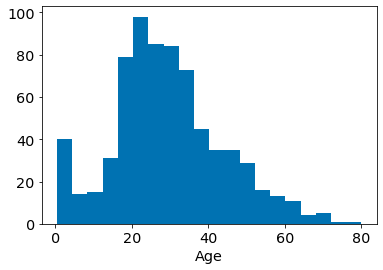

In [16]:
plt.hist(df_data['Age'].values,bins=20)
plt.xlabel('Age')
plt.show()

In [17]:
age_median = df_data['Age'].median() # calculated excluding the nan's
# np.nanmedian(df_data['Age'].values) #produces the same result
# np.median(df_data['Age'].values)   # returns nan

In [18]:
df_data['Age'].mean() # calculated excluding the nan's
np.nanmean(df_data['Age'].values) # produces the same result

29.69911764705882

**Substituting** the missing values in `Age` by the **median**.

In [19]:
df_data.loc[df_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [20]:
df_data.loc[df_data['Age'].isnull(),'Age'] = age_median

In [21]:
# df_data.isna().sum()
df_data.stb.missing()

,Missing,Total,Percent
Cabin,687,891,0.771044
PassengerId,0,891,0.000000
Survived,0,891,0.000000
Pclass,0,891,0.000000
Name,0,891,0.000000
Sex,0,891,0.000000
Age,0,891,0.000000
SibSp,0,891,0.000000
Parch,0,891,0.000000
Ticket,0,891,0.000000


/home/precchia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/precchia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


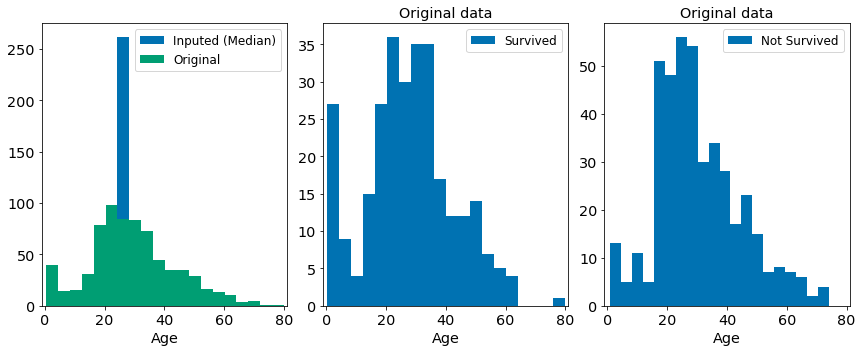

In [22]:
df_data_original = pd.read_csv('data/train.csv')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,tight_layout=True,figsize=(12,5))

ax1.hist(df_data['Age'].values,bins=20,label='Inputed (Median)')
ax1.hist(df_data_original['Age'].values,bins=20,label='Original')
# ax1.set_title()
ax1.set_xlabel('Age')
ax1.set_xlim(-1,81)
ax1.legend()

ax2.hist(df_data_original.loc[df_data_original['Survived']==1]['Age'].values, bins=20,label='Survived')
ax2.set_title('Original data')
ax2.set_xlabel('Age')
ax2.set_xlim(-1,81)
ax2.legend()

ax3.hist(df_data_original.loc[df_data_original['Survived']==0]['Age'].values,bins=20,label='Not Survived')
ax3.set_title('Original data')
ax3.set_xlabel('Age')
ax3.set_xlim(-1,81)
ax3.legend()
plt.show()

In [23]:
print('Numbers of Original Data Set (not inputed)')
print('Average Age of Survived: ', df_data_original.loc[df_data_original['Survived']==1]['Age'].mean())
print('Average Age of Not-Survived: ', df_data_original.loc[df_data_original['Survived']==0]['Age'].mean())
print('Median Age of Survived: ', df_data_original.loc[df_data_original['Survived']==1]['Age'].median())
print('Median Age of Not-Survived: ', df_data_original.loc[df_data_original['Survived']==0]['Age'].median())
print('Average Age (global): ', df_data_original['Age'].mean())
print('Median Age (global): ', df_data_original['Age'].median())

Numbers of Original Data Set (not inputed)
Average Age of Survived:  28.343689655172415
Average Age of Not-Survived:  30.62617924528302
Median Age of Survived:  28.0
Median Age of Not-Survived:  28.0
Average Age (global):  29.69911764705882
Median Age (global):  28.0


In [24]:
print('Numbers of Inputed Data Set')
print('Average Age: ', df_data['Age'].mean())
print('Median Age : ', df_data['Age'].median())

Numbers of Inputed Data Set
Average Age:  29.36158249158249
Median Age :  28.0


Note that from the _original_ dataset (i.e., not inputed), the median of _survived_ and _not-survived_ is the same as the median of the complete dataset. Therefore, I believe that input by the median will not affect the results.

## Creating new columns

**Comment**: In order to include the `Sex` in our correlation study, we will create a new column calles `Female` which two possible values: 1 if `Sex==female` and 0 if `Sex==male`.

In [25]:
# creating new column 'Female'. Values 1 --> if Sex=='female'; 0 --> if Sex=='male'

def selectSex(dataframe):
    if dataframe['Sex'] == 'female':
        return 1
    else:
        return 0

# df_data['Female'] = df_data.apply(selectSex,axis=1) # using named function
df_data['Female'] = df_data.apply(lambda row: 1 if row['Sex']=='female' else 0,axis=1) # using lambda
# df_data.drop('Female',axis=1,inplace=True)  # to delete column (for tests)
df_data.stb.freq(['Sex','Female'])

,Sex,Female,Count,Percent,Cumulative Count,Cumulative Percent
0,male,0,577,0.647587,577,0.647587
1,female,1,314,0.352413,891,1.000000


**Comment**: Converting `PClass` in `1stClass` and `2ndClass`.

If `PClass == 1` then `1stClass = 1` and `2ndClass = 0`.  
If `PClass == 2` then `1stClass = 0` and `2ndClass = 1`.  
If `PClass == 3` then `1stClass = 0` and `2ndClass = 0`.  

In [26]:
def select_1stclass(x):
    if x == 1:
        return 1
    else:
        return 0

def select_2ndclass(x):
    if x == 2:
        return 1
    else:
        return 0
    
df_data['1stClass'] = df_data.apply(lambda row: 1 if row['Pclass']==1 else 0,axis=1) # using lambda
df_data['2ndClass'] = df_data.apply(lambda row: 1 if row['Pclass']==2 else 0,axis=1) # using lambda

df_data.stb.freq(['Pclass','1stClass','2ndClass'])

,Pclass,1stClass,2ndClass,Count,Percent,Cumulative Count,Cumulative Percent
0,3,0,0,491,0.551066,491,0.551066
1,1,1,0,216,0.242424,707,0.793490
2,2,0,1,184,0.206510,891,1.000000


Checking some numbers

In [27]:
print('Original numbers')
print('# people in 1st Class: ', len(df_data.loc[df_data['Pclass']==1,'Pclass'].values))
print('# people in 2nd Class: ', len(df_data.loc[df_data['Pclass']==2,'Pclass'].values))
print('# people in 3rd Class: ', len(df_data.loc[df_data['Pclass']==3,'Pclass'].values))

print('\nNumbers in new variables:')
print('# people in 1st Class w/ value 1: ', len(df_data.loc[df_data['1stClass']==1]['1stClass'].values))
print('# people in 1st Class w/ value 0: ', len(df_data.loc[df_data['1stClass']==0]['1stClass'].values))
print('# people in 2nd Class w/ value 1: ', len(df_data.loc[df_data['2ndClass']==1]['2ndClass'].values))
print('# people in 2nd Class w/ value 0: ', len(df_data.loc[df_data['2ndClass']==0]['2ndClass'].values))

Original numbers
# people in 1st Class:  216
# people in 2nd Class:  184
# people in 3rd Class:  491

Numbers in new variables:
# people in 1st Class w/ value 1:  216
# people in 1st Class w/ value 0:  675
# people in 2nd Class w/ value 1:  184
# people in 2nd Class w/ value 0:  707


**Transforming** `Embarked` from categorical to numerical

In [28]:
from sklearn.preprocessing import LabelEncoder

label_embarked = LabelEncoder()

df_data['EmbarkedNum'] = label_embarked.fit_transform(df_data['Embarked'])
# df_data[['Embarked','EmbarkedNum']].head(10)
df_data.stb.freq(['Embarked','EmbarkedNum'])

,Embarked,EmbarkedNum,Count,Percent,Cumulative Count,Cumulative Percent
0,S,2,644,0.722783,644,0.722783
1,C,0,170,0.190797,814,0.913580
2,Q,1,77,0.086420,891,1.000000


### EmbarkedDummy

We will also consider two dummy variables to encode the information of the Embarked Port. The variables to be created are: `EmbarkedC` and `EmbarkedS`.

If port is `C` then `EmbarkedC=1` and `EmbarkedS=0`.  
If port is `S` then `EmbarkedC=0` and `EmbarkedS=1`.  
If port is `Q` then `EmbarkedC=0` and `EmbarkedS=0`. 
Because port `Q` is the case with less passengers, we choose to  be the `00` case.

In [29]:
def select_portC(x):
    if x == 'C':
        return 1
    else:
        return 0

def select_portS(x):
    if x == 'S':
        return 1
    else:
        return 0
    
df_data['EmbarkedC'] = df_data.apply(lambda row: 1 if row['Embarked']=='C' else 0,axis=1) # using lambda
df_data['EmbarkedS'] = df_data.apply(lambda row: 1 if row['Embarked']=='S' else 0,axis=1) # using lambda
df_data.stb.freq(['Embarked','EmbarkedC','EmbarkedS'])

,Embarked,EmbarkedC,EmbarkedS,Count,Percent,Cumulative Count,Cumulative Percent
0,S,0,1,644,0.722783,644,0.722783
1,C,1,0,170,0.190797,814,0.913580
2,Q,0,0,77,0.086420,891,1.000000


Checking some numbers

In [30]:
print('Original numbers')
print('# people at Port C: ', len(df_data.loc[df_data['Embarked']=='C','Embarked'].values))
print('# people at Port S: ', len(df_data.loc[df_data['Embarked']=='S','Embarked'].values))
print('# people at Port Q: ', len(df_data.loc[df_data['Embarked']=='Q','Embarked'].values))

print('\nNumbers in new variables:')
print('# people at Port C w/ value 1: ', len(df_data.loc[df_data['EmbarkedC']==1]['EmbarkedC'].values))
print('# people at Port C w/ value 0: ', len(df_data.loc[df_data['EmbarkedC']==0]['EmbarkedC'].values))
print('# people at Port S w/ value 1: ', len(df_data.loc[df_data['EmbarkedS']==1]['EmbarkedS'].values))
print('# people at Port S w/ value 0: ', len(df_data.loc[df_data['EmbarkedS']==0]['EmbarkedS'].values))

Original numbers
# people at Port C:  170
# people at Port S:  644
# people at Port Q:  77

Numbers in new variables:
# people at Port C w/ value 1:  170
# people at Port C w/ value 0:  721
# people at Port S w/ value 1:  644
# people at Port S w/ value 0:  247


## Fare Categorical

`FareCateg`: categorical variable for `Fare`, based in the **quartile** (see below).

 - `1` for `Fare` <= 7.9104
 - `2` for  7.9104 < `Fare` <= 14.454200
 - `3` for 14.454200 < `Fare`<= 31.000000
 - `4` for `Fare`> 31.000000

In [48]:
df_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [60]:
# creating variable 'FareCateg'

def select_FareCateg(dataframe):
    x = dataframe['Fare']
    firstquartile = 7.910400
    secondquartile = 14.454200
    thirdquartile= 31.0
    
    if x <= firstquartile:
        return 1
    elif firstquartile < x <= secondquartile:
        return 2
    elif secondquartile < x <= thirdquartile:
        return 3
    else:
        return 4


df_data['FareCateg'] = df_data.apply(select_FareCateg,axis=1) # using named function
df_data.stb.freq(['FareCateg'])

,FareCateg,Count,Percent,Cumulative Count,Cumulative Percent
0,2,224,0.251403,224,0.251403
1,1,223,0.250281,447,0.501684
2,4,222,0.249158,669,0.750842
3,3,222,0.249158,891,1.000000


## Correlation

In [51]:
corr=df_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female,1stClass,2ndClass,EmbarkedNum,EmbarkedC,EmbarkedS,FareCateg
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939,0.034303,-0.000086,0.013078,-0.001199,0.022148,-0.022998
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.285904,0.093349,-0.174199,0.174718,-0.155660,0.299357
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,-0.885924,-0.188432,0.170334,-0.251139,0.081720,-0.634271
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.323896,0.015831,-0.027650,0.039171,-0.014665,0.084434
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.054582,-0.055932,0.070653,-0.061970,0.070941,0.393025
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.017633,-0.000734,0.042325,-0.013725,0.063036,0.393881
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.591711,-0.118557,-0.229304,0.273614,-0.166603,0.579345
Female,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.098013,0.064746,-0.115513,0.090223,-0.125722,0.243613
1stClass,0.034303,0.285904,-0.885924,0.323896,-0.054582,-0.017633,0.591711,0.098013,1.000000,-0.288585,-0.247052,0.305181,-0.170379,0.599010
2ndClass,-0.000086,0.093349,-0.188432,0.015831,-0.055932,-0.000734,-0.118557,0.064746,-0.288585,1.000000,0.171484,-0.127763,0.192061,0.040977


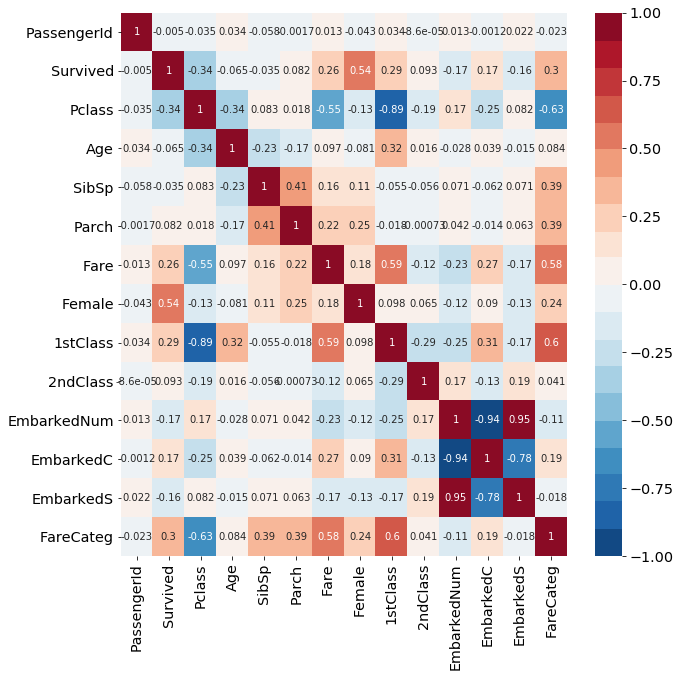

In [52]:
# correlation in a figure

fig,ax = plt.subplots(1,1,figsize=(10,10))

ax = sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap=sns.color_palette("RdBu_r", 20),center=0)#,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

**Comments**

1. `PClass` and `Fare` have the lowest negative correlation (-0.55), followed by `PClass` and `Age` (-0.37) and `PClass` and `Survived` (-0.34).
2. `Female` and `Survived` have the highest positive correlation (0.54), followed by `Parch` and `SibSp` (0.41).

(Note that we have not considered the correlations of `Pclass` and `1stClass` for instance, sinte they will be high-correlated since one was created from the other.)

## Siblings/ Spouses

Below, we explore the variable `SibSp` that accounts the number of siblings/spouses aboard Titanic.

This variable does not have `null` entries.

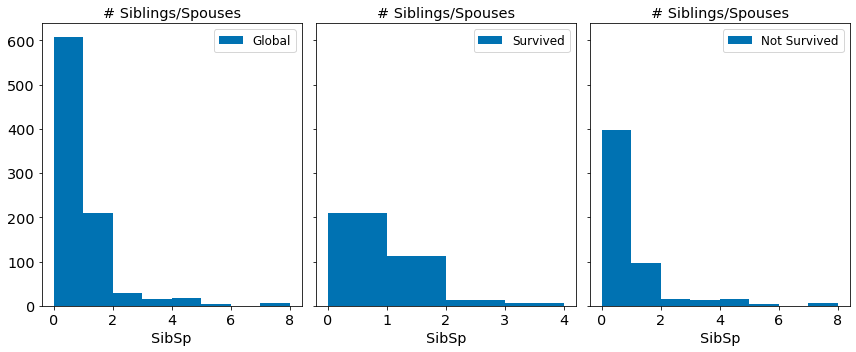

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,tight_layout=True,figsize=(12,5),sharey=True)

# ax1.hist(df_data_features['Age'].values,bins=20,label='Inputed (Median)')
ax1.hist(df_data['SibSp'].values,bins=8,label='Global')
ax1.set_title('# Siblings/Spouses')
ax1.set_xlabel('SibSp')
# ax1.set_xlim(-1,81)
ax1.legend()

ax2.hist(df_data.loc[df_data['Survived']==1]['SibSp'].values, bins=4,label='Survived')
ax2.set_title('# Siblings/Spouses')
ax2.set_xlabel('SibSp')
# ax2.set_xlim(-1,81)
ax2.legend()

ax3.hist(df_data.loc[df_data['Survived']==0]['SibSp'].values,bins=8,label='Not Survived')
ax3.set_title('# Siblings/Spouses')
ax3.set_xlabel('SibSp')
# ax3.set_xlim(-1,81)
ax3.legend()
plt.show()

In [34]:
df_data.stb.freq(['SibSp'])

,SibSp,Count,Percent,Cumulative Count,Cumulative Percent
0,0,608,0.682379,608,0.682379
1,1,209,0.234568,817,0.916947
2,2,28,0.031425,845,0.948373
3,4,18,0.020202,863,0.968575
4,3,16,0.017957,879,0.986532
5,8,7,0.007856,886,0.994388
6,5,5,0.005612,891,1.000000


## Parents/ Children

Below, we explore the variable `Parch` that accounts the number of parents/children aboard Titanic.

This variable does not have `null` entries.

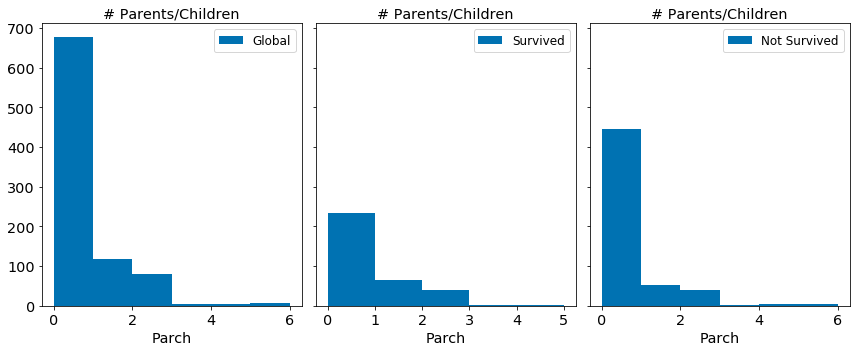

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,tight_layout=True,figsize=(12,5),sharey=True)

# ax1.hist(df_data_features['Age'].values,bins=20,label='Inputed (Median)')
ax1.hist(df_data['Parch'].values,bins=6,label='Global')
ax1.set_title('# Parents/Children')
ax1.set_xlabel('Parch')
# ax1.set_xlim(-1,81)
ax1.legend()

ax2.hist(df_data.loc[df_data['Survived']==1]['Parch'].values, bins=5,label='Survived')
ax2.set_title('# Parents/Children')
ax2.set_xlabel('Parch')
# ax1.set_xlim(-1,81)
ax2.legend()

ax3.hist(df_data.loc[df_data['Survived']==0]['Parch'].values,bins=6,label='Not Survived')
ax3.set_title('# Parents/Children')
ax3.set_xlabel('Parch')
# ax2.set_xlim(-1,81)
ax3.legend()
plt.show()

In [36]:
df_data.stb.freq(['Parch'])

,Parch,Count,Percent,Cumulative Count,Cumulative Percent
0,0,678,0.760943,678,0.760943
1,1,118,0.132435,796,0.893378
2,2,80,0.089787,876,0.983165
3,5,5,0.005612,881,0.988777
4,3,5,0.005612,886,0.994388
5,4,4,0.004489,890,0.998878
6,6,1,0.001122,891,1.000000


## `Fare`

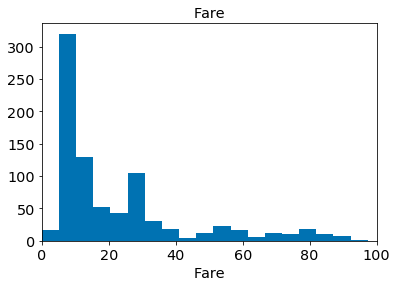

In [46]:
fig, ax1 = plt.subplots(1,1)#,tight_layout=True,figsize=(12,5),sharey=True)

ax1.hist(df_data['Fare'].values,bins=100,density=False)
ax1.set_title('Fare')
ax1.set_xlabel('Fare')
ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
# ax1.legend()
plt.show()

In [38]:
df_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

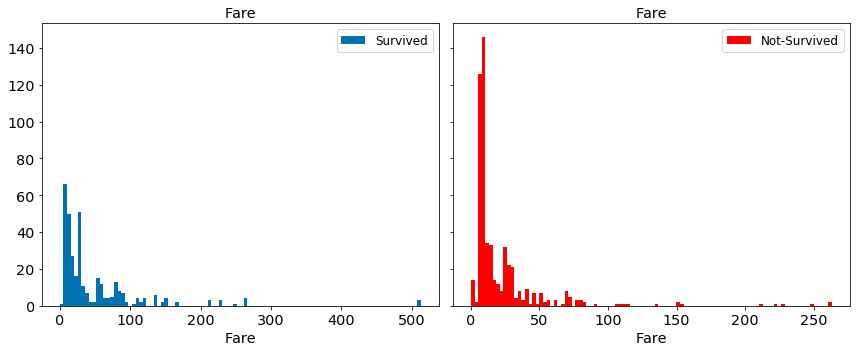

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,tight_layout=True,figsize=(12,5),sharey=True)

# lst_cases = ['','Male','','','','','Female']

n,bins,patches = ax1.hist(df_data.loc[df_data['Survived']==1]['Fare'].values,bins=100,label='Survived')
ax1.set_title('Fare')
ax1.set_xlabel('Fare')
# ax1.set_xticklabels(lst_cases,rotation=45)
ax1.legend()


ax2.hist(df_data.loc[df_data['Survived']==0]['Fare'].values,bins=100,label='Not-Survived',color='red')
ax2.set_title('Fare')
ax2.set_xlabel('Fare')
# ax2.set_xticklabels(lst_cases,rotation=45)
# ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
ax2.legend()
plt.show()

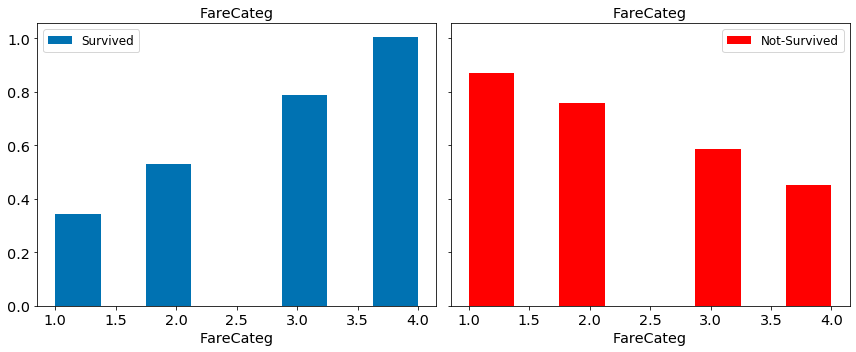

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2,tight_layout=True,figsize=(12,5),sharey=True)

# lst_cases = ['','Male','','','','','Female']

n,bins,patches = ax1.hist(df_data.loc[df_data['Survived']==1]['FareCateg'].values,bins=8,label='Survived',density=True)
ax1.set_title('FareCateg')
ax1.set_xlabel('FareCateg')
# ax1.set_xticklabels(lst_cases,rotation=45)
ax1.legend()


ax2.hist(df_data.loc[df_data['Survived']==0]['FareCateg'].values,bins=8,label='Not-Survived',color='red',density=True)
ax2.set_title('FareCateg')
ax2.set_xlabel('FareCateg')
# ax2.set_xticklabels(lst_cases,rotation=45)
# ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
ax2.legend()
plt.show()

## `Fare` and `Pclas`

Some graphs about `Fare` and `Pclas`

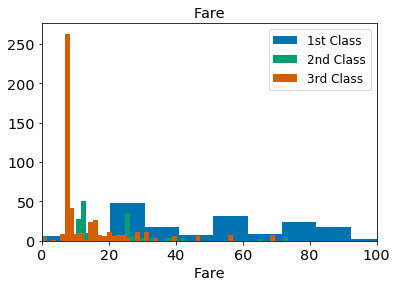

In [39]:
fig, ax1 = plt.subplots(1,1)#,tight_layout=True,figsize=(12,5),sharey=True)

ax1.hist(df_data.loc[df_data['Pclass']==1]['Fare'].values,bins=50,label='1st Class',density=False)
ax1.hist(df_data.loc[df_data['Pclass']==2]['Fare'].values,bins=50,label='2nd Class',density=False)
ax1.hist(df_data.loc[df_data['Pclass']==3]['Fare'].values,bins=50,label='3rd Class',density=False)
ax1.set_title('Fare')
ax1.set_xlabel('Fare')
ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
ax1.legend()
plt.show()

**Some values**

In [40]:
print('Average Fare for 1st Class: ', df_data.loc[df_data['Pclass']==1]['Fare'].mean())
print('Average Fare for 2nd Class: ', df_data.loc[df_data['Pclass']==2]['Fare'].mean())
print('Average Fare for 3rd Class: ', df_data.loc[df_data['Pclass']==3]['Fare'].mean())

print('Median Fare for 1st Class: ', df_data.loc[df_data['Pclass']==1]['Fare'].median())
print('Median Fare for 2nd Class: ', df_data.loc[df_data['Pclass']==2]['Fare'].median())
print('Median Fare for 3rd Class: ', df_data.loc[df_data['Pclass']==3]['Fare'].median())

Average Fare for 1st Class:  84.15468749999992
Average Fare for 2nd Class:  20.66218315217391
Average Fare for 3rd Class:  13.675550101832997
Median Fare for 1st Class:  60.287499999999994
Median Fare for 2nd Class:  14.25
Median Fare for 3rd Class:  8.05


## `Sex`

To to the graphs, we will use instead `Female`.

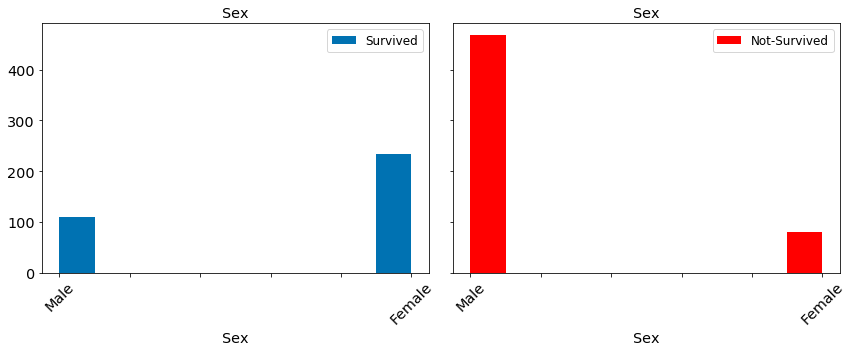

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,tight_layout=True,figsize=(12,5),sharey=True)

lst_cases = ['','Male','','','','','Female']

n,bins,patches = ax1.hist(df_data.loc[df_data['Survived']==1]['Female'].values,bins=10,label='Survived')
ax1.set_title('Sex')
ax1.set_xlabel('Sex')
ax1.set_xticklabels(lst_cases,rotation=45)
ax1.legend()


ax2.hist(df_data.loc[df_data['Survived']==0]['Female'].values,bins=10,label='Not-Survived',color='red')
ax2.set_title('Sex')
ax2.set_xlabel('Sex')
ax2.set_xticklabels(lst_cases,rotation=45)
# ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
ax2.legend()
plt.show()

## `EmbarkedNum`

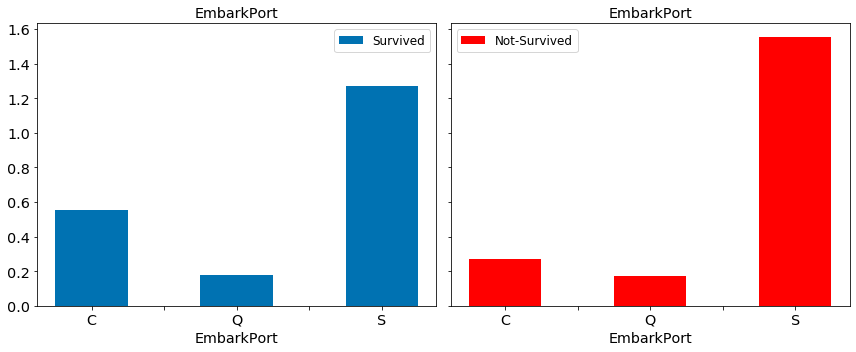

0 --> C
1 --> Q
2 --> S


In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,tight_layout=True,figsize=(12,5),sharey=True)

lst_cases = ['','C','','Q','','S']

bins=[-0.25,0.25,0.75,1.25,1.75,2.25]

n,bins,patches = ax1.hist(df_data.loc[df_data['Survived']==1]['EmbarkedNum'].values,bins=bins,label='Survived',density=True)
ax1.set_title('EmbarkPort')
ax1.set_xlabel('EmbarkPort')
ax1.set_xticklabels(lst_cases,rotation=0)
ax1.legend()


ax2.hist(df_data.loc[df_data['Survived']==0]['EmbarkedNum'].values,bins=bins,label='Not-Survived',color='red',density=True)
ax2.set_title('EmbarkPort')
ax2.set_xlabel('EmbarkPort')
ax2.set_xticklabels(lst_cases,rotation=0)
# ax1.set_xlim(0,100)
# ax1.set_ylim(0,40)
ax2.legend()
plt.show()

print('0 --> C')
print('1 --> Q')
print('2 --> S')

## Some summary graphs for all variables

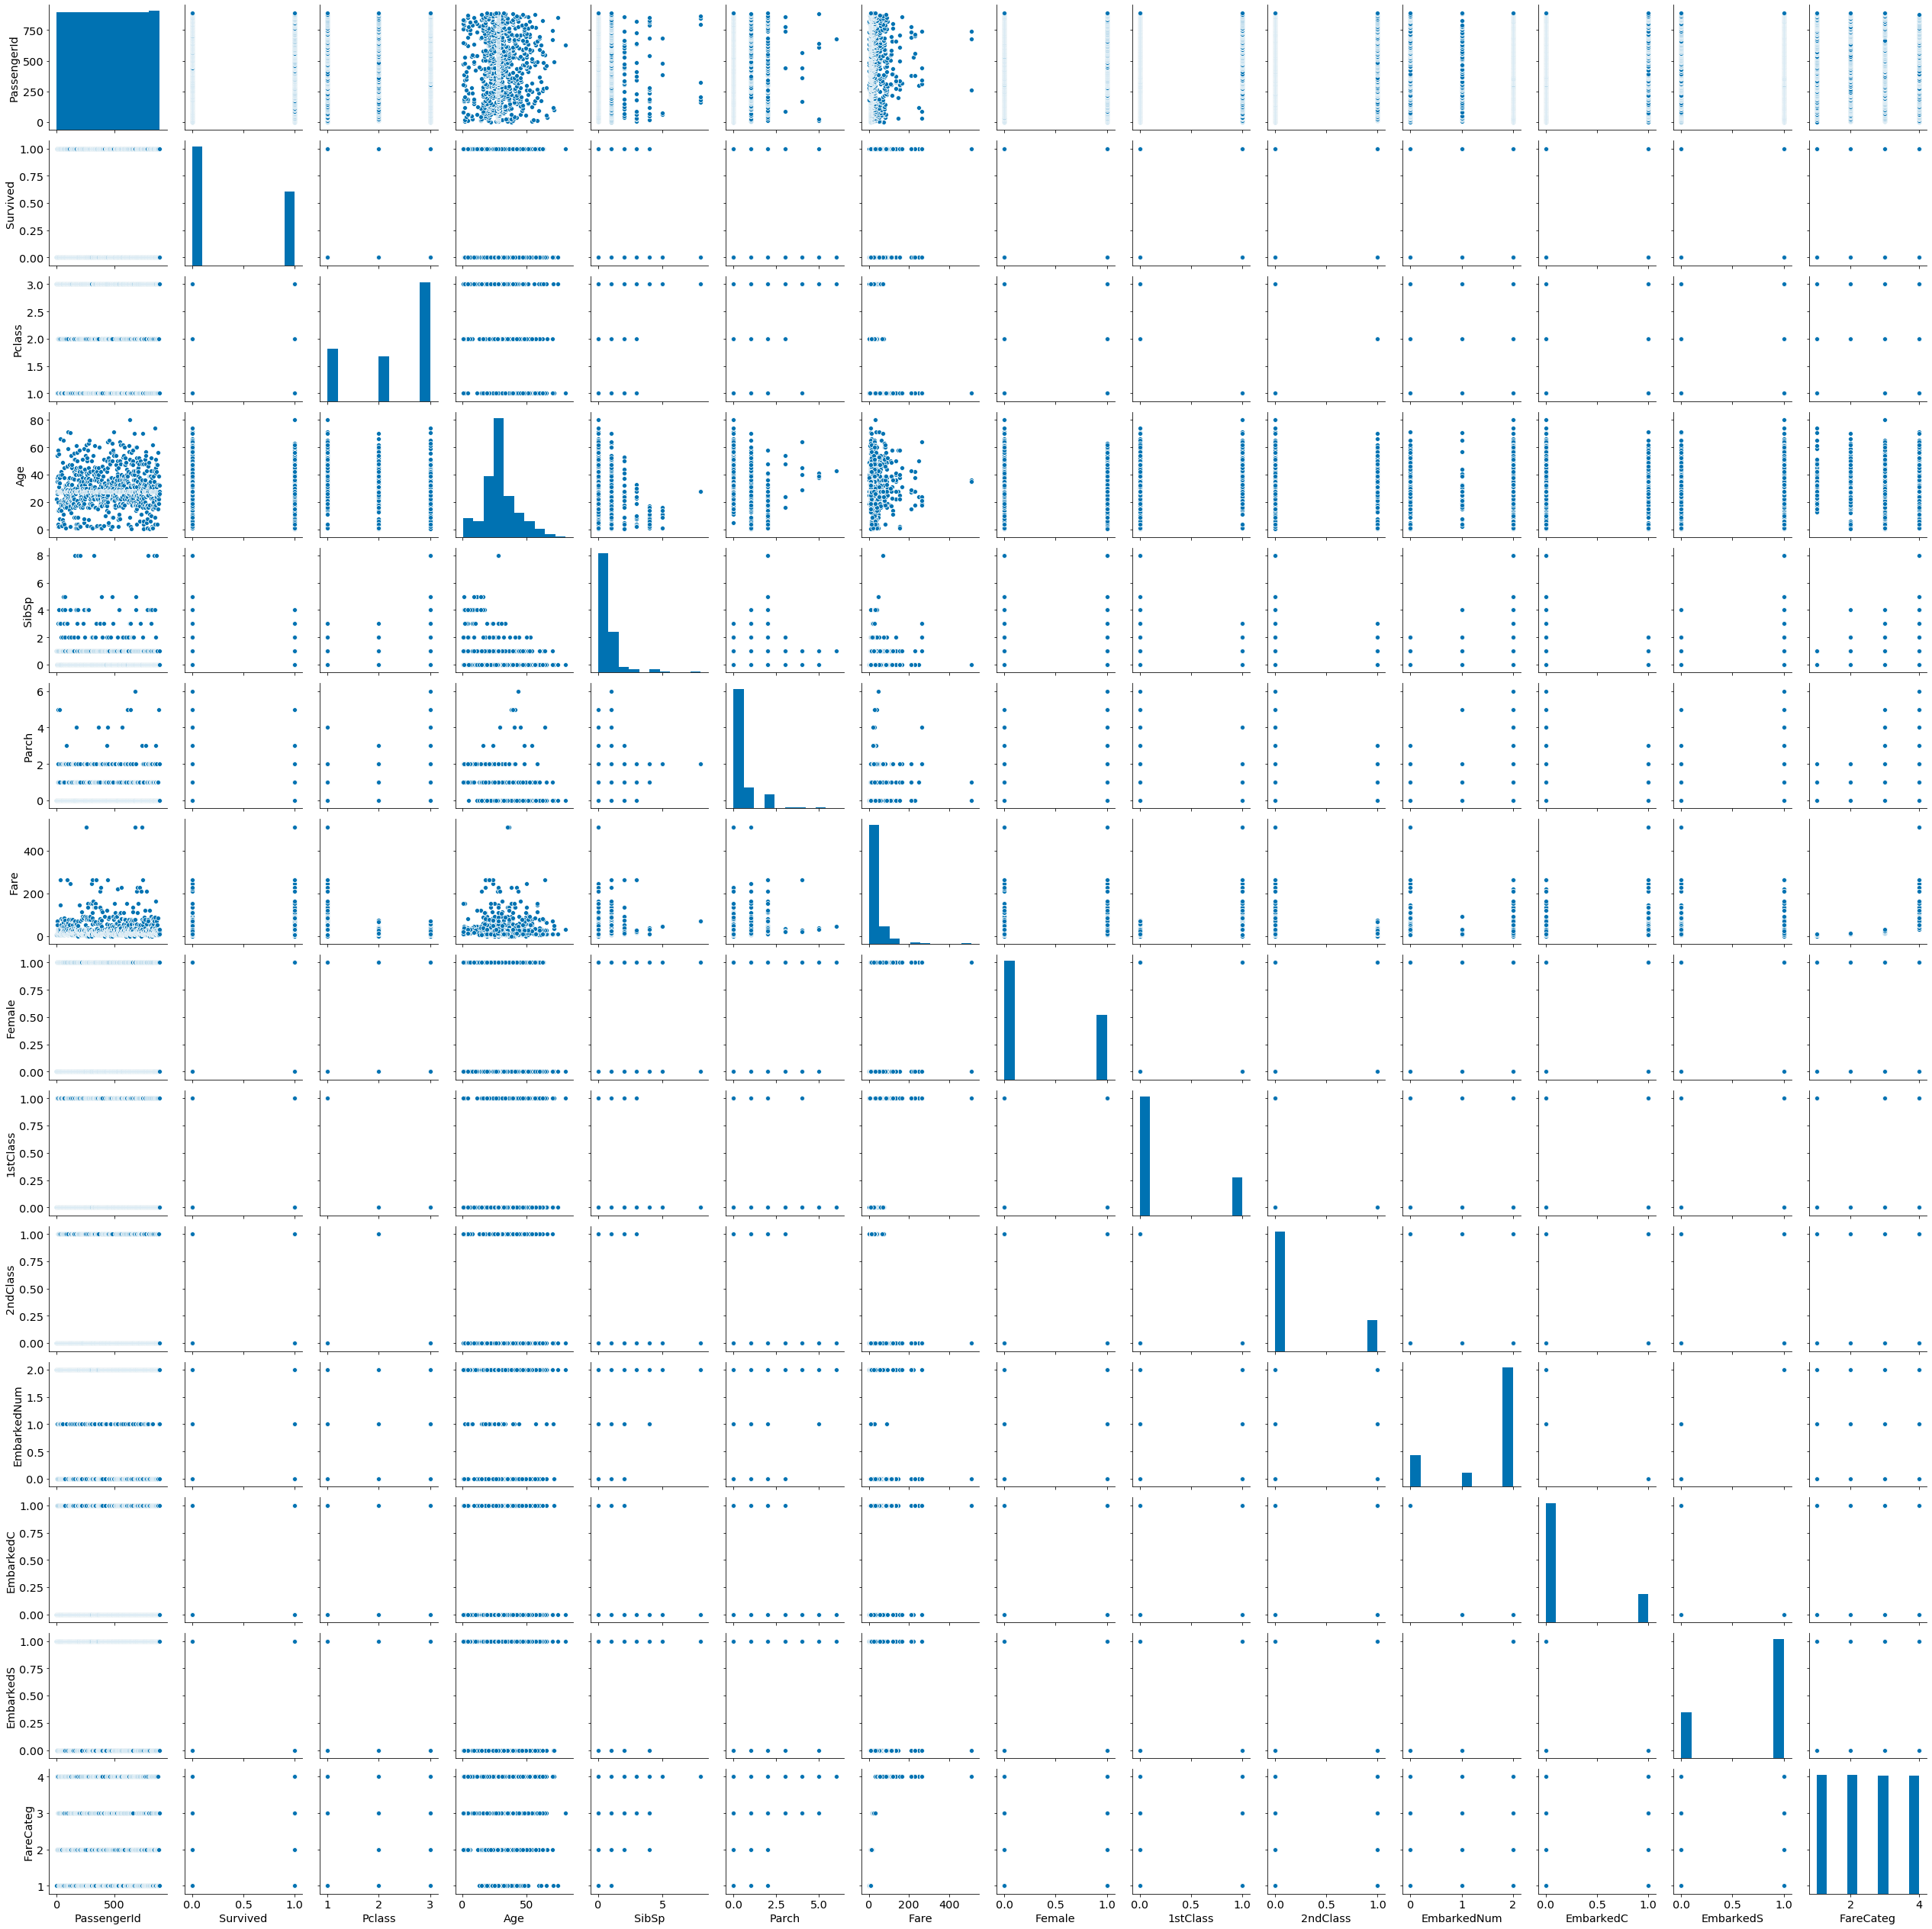

In [59]:
sns.pairplot(df_data)

# Conclusions

From the original variables we have made some imputations and we have created new variables.  
All modifications are summarized below.

## Inputations

### Embarked

There were two missing values in `Embarked`. Both registers consist in women in the 1st Class, that payed the same `Fare`. Looking for the fraction of passenger from the 1st class that embarked at each port, we see that the majority of the 1st class passengers embarked at port C. Therefore, we inputed this value at these two registers.

### Age

There were 177 missing values in `Age`. We inputed the median ( = 28) of the distribution in these empty places. Analysing the distribution of the original dataset, we see that both age distribution of those who survived and not survived have the same median (28). Therefore, we do not expect that this assumption will affect too much the results.

## New variables

New numerical variables were created for the categorical variables.

1. `Female`: created from `Sex`. Value 1 for `Sex == female` and value 0 for `Sex == male`;
2. `EmbarkedNum`: encoding of the `Embarked` variable. 0 for `C`, 1 for `Q` and 2 for `S`;
3. `EmbarkedC`: dummy variable to encode the values of port C. Vale 1 for `Embarked == C` and value 0 otherwise;
4. `EmbarkedS`: dummy variable to encode the values of port S. Vale 1 for `Embarked == S` and value 0 otherwise; For port Q, `EmbarkedC = EmbarkedS = 0`.
5. `1stClass`: dummy variable to encoce values of `Pclass` corresponding to 1st class. Value 1 if `Pclass == 1` and value 0 otherwise;
6. `2ndClass`: dummy variable to encoce values of `Pclass` corresponding to 2nd class. Value 1 if `Pclass == 2` and value 0 toherwise; For port 3rd class, `1stClass = 2ndClass = 0`.
7. `FareCateg`: categorical version of `Fare` variable. Devision based in the quatile.

## Other variables

Missing values in `Cabin` will not be treated, since it is not feasible to discover/infer the cabin for the passengers. Moreover, we do not expect that this variable would have impact in the analysis.

## Important variables

Finally, we list here the variables that we believe are important and should be included in the training process.

1. `Sex` (or its variant `Female`);
2. `Age`;
3. `Pclass` (or its variants `1stClass` and `2ndClass`);
4. `Embarked` (or its variants `EmbarkedC` and `EmbarkedS` or `EmbarkedNum`);
5. `Fare` (or its variant `FareCateg`);
6. `SibSp` or `Parch` (one of the two. I believe that these two variable have some correlation that cannot be ignored, for instance, if passenger has siblings it is probable to have parents.

## Variables to not be included

Variables `PassengerId`, `Name`, `Ticket` and `Cabin` do not give important information to help predict the target (`Survived`), therefore we will not include in the analysis.

# Data treatment code

Below, we reproduce the code to read the data, do the inputations and variables creations.